In [21]:
# Подготовка библиотек к работе
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pylab as plt
%matplotlib inline
# Показывать весь вывод ячейки, а не последнее значение
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivityt='all'


In [53]:
# Получение данных
df = pd.read_csv('../../data/beauty.csv',sep=';')

### 1. Что мы хотим узнать?

Можно ли предсказать  значение параметра красота(looks) на основе имеющихся данных/


###  2. Проблемы которые встают перед нами
Параметр looks является категориальным и имеет 5 степеней градации
Для первого самостоятельного анализа, думаю следует превратить этот признак в бинарный
По принципу **>3 красивый, <3 некрасивый**

Также у меня нет тестового датасета, а значит нужно будет создать его с помощью тест сплит

In [13]:
df['looks'].unique()

array([4, 3, 2, 5, 1], dtype=int64)

**Analyze by describing data**

Проведем оценку датасета: Его размеры, тип данных, есть ли пропуски

In [10]:
df.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


In [15]:
# У нас 1260 обьектов имеющих 10 признаков
df.shape

(1260, 10)

In [26]:
# Кстати обрати внимание на разницу между этими двумя командами
# Возвращает массив из названий колонок
df.columns.values


array(['wage', 'exper', 'union', 'goodhlth', 'black', 'female', 'married',
       'service', 'educ', 'looks'], dtype=object)

In [25]:
# А тут индекс, хотя итерироватся естественно можно и так и так
df.columns

Index(['wage', 'exper', 'union', 'goodhlth', 'black', 'female', 'married',
       'service', 'educ', 'looks'],
      dtype='object')

#### Опишем что означают эти колонки
+ wage -зарплата в час. Вещественный признак
+ exper -опыт работы. Целочисленный признак
+ union -состоит или нет в профсоюзе. Бинарный признак
+ goodhlth -здоровье. Бинарный признак
+ black -цвет кожи. Бинарный признак
+ female - пол. Бинарный признак.Мужчина значит female ==0
+ married - состоит ли в браке. Бинарный признак
+ service - непонятный признак. Бинарный признак
+ educ - Образование. Целочисленый признак
+ looks -Оценка красоты.Целевой категориальный признак

### Первый взгляд. Размышления.Какие признаки могут быть важными для оценки красоты
Попробуем порассуждать


### Сначала подумаем над неважными признаками
В глаза сразу бросается признак **union** от того что человек состоит в профсоюзе, он очевидно не становится красивее.

Признак **service** просто непонятно что означает. На будущее нужно всегда понимать что означает каждая колонка. Числа не лгут(но могут ввести в заблуждение) ,но числа и здравый смысл могут открыть истину

**educ**  образование тоже врядли сильно влияет на оценку красоты 



In [35]:
#goodhlth** зависит от того что понимается под этим.
# Проверим соотношение. Как видно разница очень большая. В те времена инклюзивность не бьла в моде.
# Да и людям нравится смотреть на здоровых моделей 
df['goodhlth'].value_counts()

1    1176
0      84
Name: goodhlth, dtype: int64

### Пограничные признаки
Эти признаки думаю очень зависят от выборки людей которых опрашивали, чтобы получить итоговую оценку. Почему я так думаю?

Признак black - очевидно, что большинству людей нравятся люди с таким же цветом кожи, скажем чернокожие увеличивали бы оценку для чернокожих, мде, звучит по расистки
**female** - большинство моделей женщины и очевидно что если в выборке было больше мужчин то у женщин-моделей будут выше оценки
правда тут есть один нюанс. Неизвестно кем ставились результирующие оценки, если предположить что это были специалисты из индустрии моды, то учитывая что там высок процент людей с нетрадиционной ориентацией, то мужчины-модели будут получать оценки выше чем должны.
**married** - 


## Важные признаки
wage -кто красивее тому больше платят, если сформулировать идею по простому

# Первичный анализ

In [39]:
df.describe()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,6.306690,18.206349,0.272222,0.933333,0.073810,0.346032,0.691270,0.273810,12.563492,3.185714
std,4.660639,11.963485,0.445280,0.249543,0.261564,0.475892,0.462153,0.446089,2.624489,0.684877
min,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000
25%,3.707500,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,3.000000
50%,5.300000,15.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,12.000000,3.000000
75%,7.695000,27.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,13.000000,4.000000
max,77.720000,48.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,5.000000


In [40]:
# Смотрим на наличие пропусков
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 10 columns):
wage        1260 non-null float64
exper       1260 non-null int64
union       1260 non-null int64
goodhlth    1260 non-null int64
black       1260 non-null int64
female      1260 non-null int64
married     1260 non-null int64
service     1260 non-null int64
educ        1260 non-null int64
looks       1260 non-null int64
dtypes: float64(1), int64(9)
memory usage: 98.6 KB


In [43]:
# Кстати следует замомнить, чтобы поле по которому производится группировка не становилось индексом
# нужно использовать параметр as_index=False.
df.groupby(['looks','female'],as_index=False)['wage'].mean()
# Видим в таблице что мужчины получают больше во всех категориях красоты.Может быть при сборе данных перепутали 0 и 1.
# Хотя может быть это данные по актерам а не по моделям и тогда разрыв в заработной плате понятен

,looks,female,wage
0,1,0,6.163750
1,1,1,2.154000
2,2,0,6.249091
3,2,1,3.829074
4,3,0,7.598957
5,3,1,4.207854
6,4,0,7.226447
7,4,1,4.745074
8,5,0,9.923636
9,5,1,3.902500


### Подготовим датасет

In [56]:
# Сделаем целевой признак бинарным
df['looks'] = df['looks'] > 3

In [61]:
df['looks']=df['looks'].map({True:1,False:0})

In [69]:
d = df['looks'].value_counts()


Теперь создадим 2 датасета в одном все бинарные данные будут кодированы с помощью One-Hot-Encoding.
а второй оставим без изменений

In [74]:
one_hot_df = df.copy()

In [77]:
# Выделим целевой признак
y = df['looks']


### Визуальный анализ данных

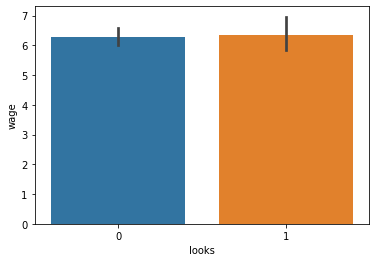

In [79]:
sns.barplot(x='looks',y='wage',data=df);
# по этому графику чего то необычного не наблюдается

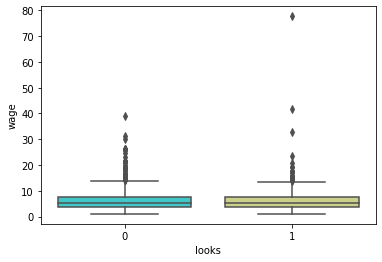

In [80]:
# построиим ящик с усами
sns.boxplot(x='looks',y='wage',data=df,palette='rainbow');
# как видим почасовая зарплата не очень зависит от категории красоты.Конечно я разделил категории, наверное не правильно,но это тренировка 

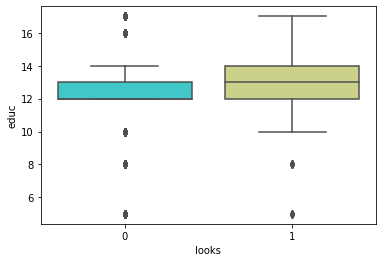

In [82]:
# пока какую то взаимосвязь я вижу только между образованием и красотой
sns.boxplot(x='looks',y='educ',data=df,palette='rainbow');

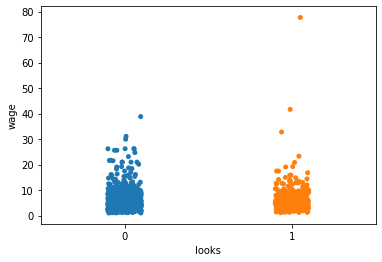

In [83]:
sns.stripplot(x='looks',y='wage',data=df);

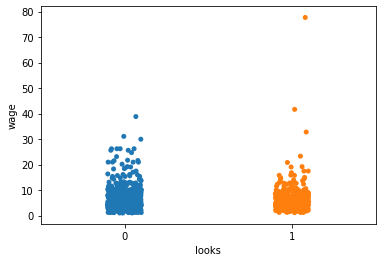

In [84]:
sns.stripplot(x='looks',y='wage',data=df,jitter=True);

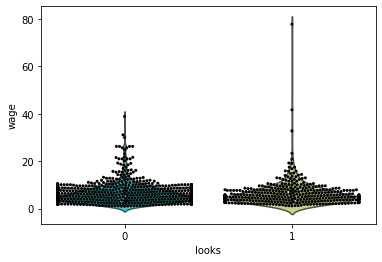

In [89]:
sns.violinplot(x='looks',y='wage',data=df,palette='rainbow')
sns.swarmplot(x='looks',y= 'wage',data=df,color='black',size=3);

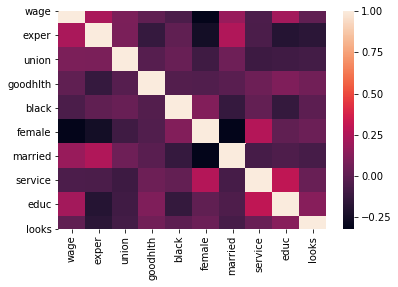

In [90]:
# Посмотрим на корреляцию
sns.heatmap(df.corr());

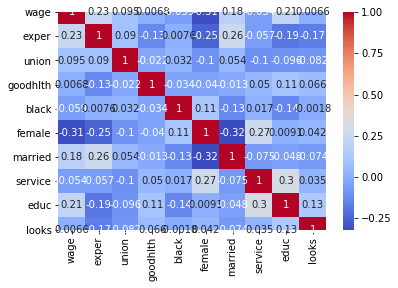

In [91]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm');

In [92]:
df.corr()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
wage,1.000000,0.234632,0.094529,0.006756,-0.059052,-0.313419,0.184521,-0.053653,0.212333,0.006621
exper,0.234632,1.000000,0.089792,-0.131609,0.007566,-0.247209,0.255607,-0.057328,-0.186200,-0.165064
union,0.094529,0.089792,1.000000,-0.022398,0.031939,-0.100037,0.053629,-0.103633,-0.096022,-0.082419
goodhlth,0.006756,-0.131609,-0.022398,1.000000,-0.034073,-0.039684,-0.013315,0.049947,0.107129,0.065944
black,-0.059052,0.007566,0.031939,-0.034073,1.000000,0.113703,-0.133306,0.017261,-0.138157,-0.001776
female,-0.313419,-0.247209,-0.100037,-0.039684,0.113703,1.000000,-0.319228,0.267961,0.009105,0.041603
married,0.184521,0.255607,0.053629,-0.013315,-0.133306,-0.319228,1.000000,-0.075082,-0.047674,-0.073789
service,-0.053653,-0.057328,-0.103633,0.049947,0.017261,0.267961,-0.075082,1.000000,0.301628,0.035332
educ,0.212333,-0.186200,-0.096022,0.107129,-0.138157,0.009105,-0.047674,0.301628,1.000000,0.132318
looks,0.006621,-0.165064,-0.082419,0.065944,-0.001776,0.041603,-0.073789,0.035332,0.132318,1.000000


In [ ]:
# как видим есть только очень слабая корреляция с уровнем образования

In [ ]:
# Импортируем библиотеки для машинного обучения

In [93]:
from sklearn.tree import DecisionTreeClassifier

In [94]:
# удаляем целевой столбец
df.drop('looks',inplace=True,axis=1)

In [97]:
from sklearn.model_selection import train_test_split,cross_val_score


In [99]:
# Делим выборку на тренировчную и тестовую
X_train, X_holdout, y_train, y_holdout = train_test_split(df,y,
                                                      test_size=0.3,
                                                     random_state=17)

In [159]:
# Создаем первое дерево
first_tree = DecisionTreeClassifier(random_state=17,max_depth=3)

In [160]:
# Смотрим на среднее значение кроссвалидации
np.mean(cross_val_score(first_tree,X_train,y_train,cv=10))

0.6916496424923392

In [106]:

from sklearn.neighbors import KNeighborsClassifier

In [107]:
# создаем первый кнн
first_knn = KNeighborsClassifier()

In [109]:
np.mean(cross_val_score(first_knn,X_train,y_train,cv=10))

0.6257788559754852

In [ ]:
# Обучим наши модели


In [161]:
%%time
first_tree.fit(X_train,y_train)

Wall time: 5.86 ms


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=17, splitter='best')

In [111]:
%%time
first_knn.fit(X_train,y_train)

Wall time: 5.86 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [113]:
from sklearn.metrics import accuracy_score

In [162]:
# Теперь сделаем прогнозы для тестовой выборки
first_tree_pred = first_tree.predict(X_holdout)
accuracy_score(y_holdout,first_tree_pred)
# ха, чуть лучше чем методом тыка

0.6587301587301587

In [163]:
# Метод ближайших соседей
first_knn_pred = first_knn.predict(X_holdout)
accuracy_score(y_holdout,first_knn_pred)

0.6084656084656085

#### Попробуем найти оптимальные варианты для дерева решений


In [116]:
from sklearn.model_selection import GridSearchCV,cross_val_score


In [117]:
# словарь с параметрами
tree_params = {'max_depth':range(1,11),
              'max_features':range(1,10)}

In [127]:
tree_grid = GridSearchCV(first_tree,tree_params,
                              cv=5,n_jobs=-1,
                        verbose=True)
tree_grid


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=17,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'max_

In [128]:
tree_grid.fit(X_train,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 370 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:    5.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=17,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'max_

In [129]:
# Лучшее сочетание
tree_grid.best_params_
# Хахаха вот это значение

{'max_depth': 1, 'max_features': 1}

In [164]:
# лучшее значение
tree_grid.best_score_

0.6938751926040062

In [132]:
# О уже лучше
accuracy_score(y_holdout,tree_grid.predict(X_holdout))

0.701058201058201

### Попробуем настроить число соседей в методе ближайших соседей


In [133]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [134]:
knn_pipe = Pipeline([('scaler',StandardScaler()),('knn',KNeighborsClassifier(n_jobs=-1))])

In [138]:
knn_params={'knn__n_neighbors':range(1,10)}

In [139]:
knn_grid = GridSearchCV(knn_pipe,knn_params,
                       cv=5,n_jobs=-1,
                       verbose=True)

In [140]:
knn_grid.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    5.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('knn',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=-1,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False),
             

In [141]:
knn_grid.best_params_, knn_grid.best_score_

({'knn__n_neighbors': 6}, 0.6689008731381613)

In [142]:
accuracy_score(y_holdout,knn_grid.predict(X_holdout))

0.6507936507936508

In [171]:
y_train.value_counts()

0    612
1    270
Name: looks, dtype: int64

In [165]:
# используем .dot формат для визуализации самого первого дерева с долей правильных ответов 0.55 
from ipywidgets import Image
from io import StringIO
import pydotplus
from sklearn.tree import export_graphviz

dot_data = StringIO()
export_graphviz(first_tree, feature_names=df.columns, 
                out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(value=graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x05\x06\x00\x00\x01\xf1\x08\x06\x00\x00\x00?{a\x1f\x…

In [158]:
dot_data = StringIO()
export_graphviz(tree_grid.best_estimator_, feature_names=df.columns, 
                out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(value=graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01C\x00\x00\x00\xdc\x08\x06\x00\x00\x00\xeat\xc3%\x…

In [ ]:
# Подытоживая
Все очен